In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
humidity=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/humidity.csv")
humidity['datetime'] = pd.to_datetime(humidity['datetime'])
humidity['date'] = humidity['datetime'].dt.date
#humidity.head()
bo_humidity=humidity.loc[:,["date","Boston"]]
bo_humidity.head()

,date,Boston
0,2012-10-01,NaN
1,2012-10-01,68.0
2,2012-10-01,68.0
3,2012-10-01,68.0
4,2012-10-01,68.0


In [3]:
bo_humidity.isnull().sum()

date        0
Boston    449
dtype: int64

In [5]:
bo_crime=pd.read_csv("/Users/rudranibhadra/Downloads/crime.csv")
bo_crime['OCCURRED_ON_DATE'] = pd.to_datetime(bo_crime['OCCURRED_ON_DATE'])
bo_crime['date'] = bo_crime['OCCURRED_ON_DATE'].dt.date
bo_crime.head()
#with open('/Users/rudranibhadra/Downloads/crime.csv', 'r', newline='', encoding='utf-8') as csvfile:
#ny_crime = ny_crime.dropna(subset=['CMPLNT_FR_DT'])
#ny_crime.isnull().sum

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,date
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",2018-10-03
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",2018-08-30
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",2018-10-03
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",2018-10-03
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",2018-10-03


In [6]:
temperature=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/temperature.csv")
temperature['datetime'] = pd.to_datetime(temperature['datetime'])
temperature['date'] = temperature['datetime'].dt.date
#temperature.head()
bo_temp=temperature.loc[:,["date","Boston"]]
bo_temp.head()

,date,Boston
0,2012-10-01,NaN
1,2012-10-01,287.170000
2,2012-10-01,287.186092
3,2012-10-01,287.231672
4,2012-10-01,287.277251


In [7]:
bo_temp.isnull().sum()

date      0
Boston    3
dtype: int64

In [8]:
bo_temp['Boston'] = bo_temp['Boston'].fillna(bo_temp.groupby('date')['Boston'].transform('mean'))

In [9]:
bo_temp.isnull().sum()

date      0
Boston    0
dtype: int64

In [10]:
df1 = bo_crime.groupby(bo_crime['date']).size().reset_index(name='No of crimes')

In [11]:
df1.head()

,date,No of crimes
0,2015-06-15,249
1,2015-06-16,249
2,2015-06-17,234
3,2015-06-18,294
4,2015-06-19,289


In [12]:
data=pd.merge(bo_temp,df1, on='date')

In [13]:
data.isnull().sum()

date            0
Boston          0
No of crimes    0
dtype: int64

In [14]:
data.rename(columns={'Boston': 'Avg Temperature'}, inplace=True)

In [15]:
data.head()

,date,Avg Temperature,No of crimes
0,2015-06-15,289.234796,249
1,2015-06-15,288.214000,249
2,2015-06-15,288.439758,249
3,2015-06-15,288.319437,249
4,2015-06-15,288.783667,249


In [16]:
bo_humidity['Boston'] =bo_humidity['Boston'].fillna(bo_humidity.groupby('date')['Boston'].transform('mean'))

In [17]:
pressure=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/pressure.csv")
pressure['datetime'] = pd.to_datetime(pressure['datetime'])
pressure['date'] = pressure['datetime'].dt.date
#pressure.head()
bo_pressure=pressure.loc[:,["date","Boston"]]
bo_pressure.head()

,date,Boston
0,2012-10-01,NaN
1,2012-10-01,1014.0
2,2012-10-01,1014.0
3,2012-10-01,1014.0
4,2012-10-01,1014.0


In [18]:
bo_pressure['Bosto'] = bo_pressure['Boston'].fillna(bo_pressure.groupby('date')['Boston'].transform('mean'))

In [19]:
data1=pd.merge(bo_humidity,data, on='date')

In [20]:
data1.head()

,date,Boston,Avg Temperature,No of crimes
0,2015-06-15,70.0,289.234796,249
1,2015-06-15,70.0,288.214000,249
2,2015-06-15,70.0,288.439758,249
3,2015-06-15,70.0,288.319437,249
4,2015-06-15,70.0,288.783667,249


In [21]:
data1.rename(columns={'Boston': 'Avg Humidity'}, inplace=True)
data2=pd.merge(bo_pressure,data1, on='date')
data2.rename(columns={'Boston': 'Avg Pressure'}, inplace=True)
data2.head()

,date,Avg Pressure,Bosto,Avg Humidity,Avg Temperature,No of crimes
0,2015-06-15,1031.0,1031.0,70.0,289.234796,249
1,2015-06-15,1031.0,1031.0,70.0,288.214000,249
2,2015-06-15,1031.0,1031.0,70.0,288.439758,249
3,2015-06-15,1031.0,1031.0,70.0,288.319437,249
4,2015-06-15,1031.0,1031.0,70.0,288.783667,249


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427777 entries, 0 to 12427776
Data columns (total 6 columns):
date               object
Avg Pressure       float64
Bosto              float64
Avg Humidity       float64
Avg Temperature    float64
No of crimes       int64
dtypes: float64(4), int64(1), object(1)
memory usage: 663.7+ MB


In [23]:
data2.isnull().sum()

date               0
Avg Pressure       0
Bosto              0
Avg Humidity       0
Avg Temperature    0
No of crimes       0
dtype: int64

In [24]:
weather_description=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/weather_description.csv")
weather_description.head()
weather_description['datetime'] = pd.to_datetime(weather_description['datetime'])
weather_description['date'] = weather_description['datetime'].dt.date
#humidity.head()
bo_rain=weather_description.loc[:,["date","Boston"]]
bo_rain.head()

,date,Boston
0,2012-10-01,NaN
1,2012-10-01,sky is clear
2,2012-10-01,few clouds
3,2012-10-01,few clouds
4,2012-10-01,few clouds


In [25]:
bo_rain = bo_rain.dropna(subset=['Boston'])
bo_rain=bo_rain.groupby('date')['Boston'].agg(lambda x: x.value_counts().index[0]).to_frame().reset_index()
bo_rain.head()

,date,Boston
0,2012-10-01,few clouds
1,2012-10-02,few clouds
2,2012-10-03,sky is clear
3,2012-10-04,mist
4,2012-10-05,mist


In [26]:
data3=pd.merge(data2,bo_rain,on='date')
data3.rename(columns={'Boston': 'weather description'}, inplace=True)
data3=data3[['date','Avg Temperature','Avg Humidity','Avg Pressure','weather description','No of crimes']]

In [27]:
data3.head()

,date,Avg Temperature,Avg Humidity,Avg Pressure,weather description,No of crimes
0,2015-06-15,289.234796,70.0,1031.0,moderate rain,249
1,2015-06-15,288.214000,70.0,1031.0,moderate rain,249
2,2015-06-15,288.439758,70.0,1031.0,moderate rain,249
3,2015-06-15,288.319437,70.0,1031.0,moderate rain,249
4,2015-06-15,288.783667,70.0,1031.0,moderate rain,249


In [29]:
def f(x):
    x = x-273.15
    return float(x)

data3['Avg Temperature']=data3['Avg Temperature'].apply(f)

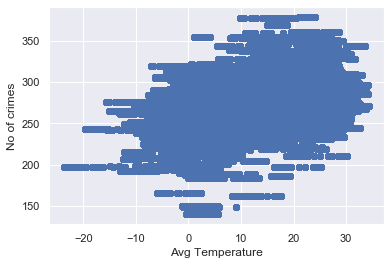

In [32]:
sns.set(color_codes=True)
plt.scatter(data3['Avg Temperature'],data3['No of crimes'],color='b',alpha=0.01)
plt.xlabel('Avg Temperature')
plt.ylabel('No of crimes')
plt.show()

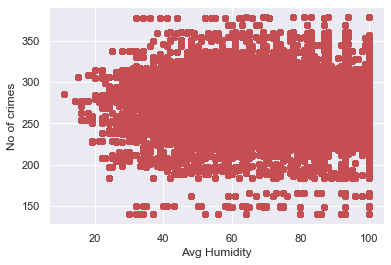

In [33]:
plt.scatter(data3['Avg Humidity'],data3['No of crimes'],color='r',alpha=0.01)
plt.xlabel('Avg Humidity')
plt.ylabel('No of crimes')
plt.show()

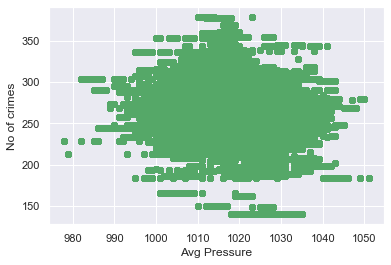

In [34]:
plt.scatter(data3['Avg Pressure'],data3['No of crimes'],color='g',alpha=0.5)
plt.xlabel('Avg Pressure')
plt.ylabel('No of crimes')
plt.show()

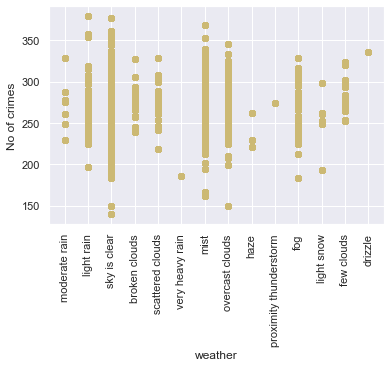

In [35]:
plt.scatter(data3['weather description'],data3['No of crimes'],color='y',alpha=0.5)
plt.xlabel('weather')
plt.ylabel('No of crimes')
plt.xticks(rotation=90)
plt.show()

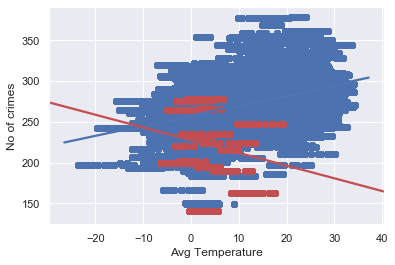

In [36]:
data3['date'] = pd.to_datetime(data3['date'])
ch = data3[(data3['date'].dt.month == 12) & (data3['date'].dt.day.isin([24,25,26,27,28,29,30,31]))]
sns.set(color_codes=True)
sns.regplot(data3['Avg Temperature'], data3['No of crimes'], color='b')
sns.regplot(ch['Avg Temperature'],ch['No of crimes'],color='r')

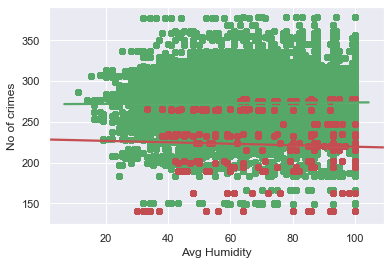

In [37]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Humidity'], data3['No of crimes'], color='g')
sns.regplot(ch['Avg Humidity'],ch['No of crimes'],color='r')

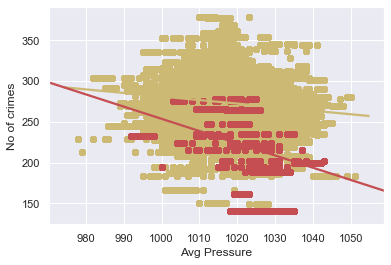

In [116]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Pressure'], data3['No of crimes'], color='y')
sns.regplot(ch['Avg Pressure'],ch['No of crimes'],color='r')

In [117]:
data3.head()

,date,Avg Temperature,Avg Humidity,Avg Pressure,weather description,No of crimes
0,2015-06-15,289.234796,70.0,1031.0,moderate rain,249
1,2015-06-15,288.214000,70.0,1031.0,moderate rain,249
2,2015-06-15,288.439758,70.0,1031.0,moderate rain,249
3,2015-06-15,288.319437,70.0,1031.0,moderate rain,249
4,2015-06-15,288.783667,70.0,1031.0,moderate rain,249


In [38]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
#x_test = x_test.drop(['date'], axis=1)
#x_train = x_train.drop(['date'], axis=1)
from sklearn.model_selection import train_test_split
#data3.head()
from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
X=pd.DataFrame(data3[['Avg Temperature','Avg Humidity','Avg Pressure']])
#x_scaled = min_max_scaler.fit_transform(X)
#x_new = pd.DataFrame(x_scaled)
y=pd.DataFrame(data3.iloc[:,5])
#x_new.head()
#plt.plot(x_new)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
X_train.head()
# data3.info()
X_train1=pd.DataFrame(X_train['Avg Temperature'])
X_test1=pd.DataFrame(X_test['Avg Temperature'])
X_train2=pd.DataFrame(X_train['Avg Humidity'])
X_test2=pd.DataFrame(X_test['Avg Humidity'])
X_train3=pd.DataFrame(X_train['Avg Pressure'])
X_test3=pd.DataFrame(X_test['Avg Pressure'])

[257.76557502]
[[1.24892919]]


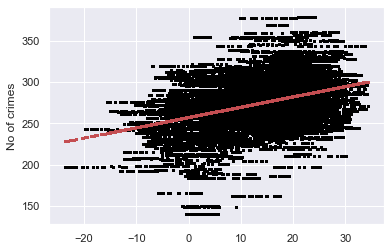

In [39]:
lr=LinearRegression()

lr.fit(X_train1, y_train)
prediction=lr.predict(np.sort(X_train1, axis=0))

y_pred = lr.predict(X_test1)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test1, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test1, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()


[271.59372295]
[[0.02157358]]


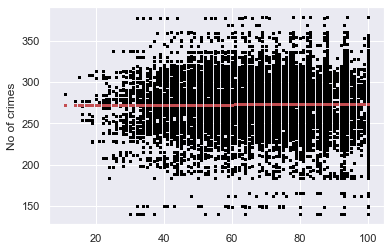

In [40]:
lr=LinearRegression()

lr.fit(X_train2, y_train)
prediction=lr.predict(np.sort(X_train2, axis=0))

y_pred = lr.predict(X_test2)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test2, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test2, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

[717.28351775]
[[-0.43617064]]


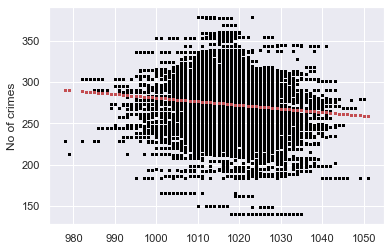

In [41]:
lr=LinearRegression()

lr.fit(X_train3, y_train)
prediction=lr.predict(np.sort(X_train3, axis=0))

y_pred = lr.predict(X_test3)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test3, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test3, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

In [42]:
lr=LinearRegression()

lr.fit(X_train, y_train)
prediction=lr.predict(np.sort(X_train, axis=0))

y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)

[413.72190689]
[[ 1.22670672 -0.03264373 -0.15046193]]


In [43]:
X_new = pd.DataFrame({'Avg Temperature': [0],'Avg Humidity':[30],'Avg Pressure':[1000]})
lr.predict(X_new)

array([[262.28066678]])

In [44]:
#avg no of crimes in summer and winter months
#summer
sm = data3[(data3['date'].dt.month == 5) | (data3['date'].dt.month == 6) | (data3['date'].dt.month == 7) | (data3['date'].dt.month == 8)]
#winter
wn = data3[(data3['date'].dt.month == 11) | (data3['date'].dt.month == 12) | (data3['date'].dt.month == 1) | (data3['date'].dt.month == 2)]

The average number of incidents in the winter months in Boston is: 258.903706944523


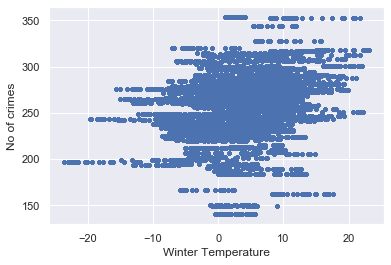

In [47]:
# plt.scatter(sm['Avg Temperature'], sm['No of crimes'], color='r',alpha=0.5,s=5)
plt.scatter(wn['Avg Temperature'], wn['No of crimes'], color='b',alpha=0.5,s=5)
plt.xlabel('Winter Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the winter months in Boston is:", np.mean(wn['No of crimes']))

The average number of incidents in the summer months in Boston is: 282.5833333333333


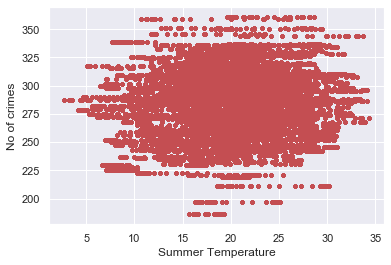

In [48]:
plt.scatter(sm['Avg Temperature'], sm['No of crimes'], color='r',alpha=0.5,s=5)
plt.xlabel('Summer Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the summer months in Boston is:", np.mean(sm['No of crimes']))